# Distancias, Proximidades y PCA

## 1) Carga de librerías y dataset

Usaremos el dataset **Wine** (178 muestras, 13 atributos fisicoquímicos) incluido en `scikit-learn`. Es numérico y multiclase, ideal para trabajar con distancias y PCA.


In [45]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity


plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.grid"] = True


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Seba\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
# Cargar dataset Wine como DataFrame
wine = load_wine(as_frame=True)
df = wine.frame.copy()
df.rename(columns={"target": "clase"}, inplace=True)

# Separar X (características) e y (etiqueta)
X = df.drop(columns=["clase"]).copy()
y = df["clase"].copy()

print("Dimensiones (filas, columnas):", df.shape)
df.head()


Dimensiones (filas, columnas): (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,clase
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2) Correlaciones entre variables

Calculamos la matriz de correlación de Pearson y la visualizamos.


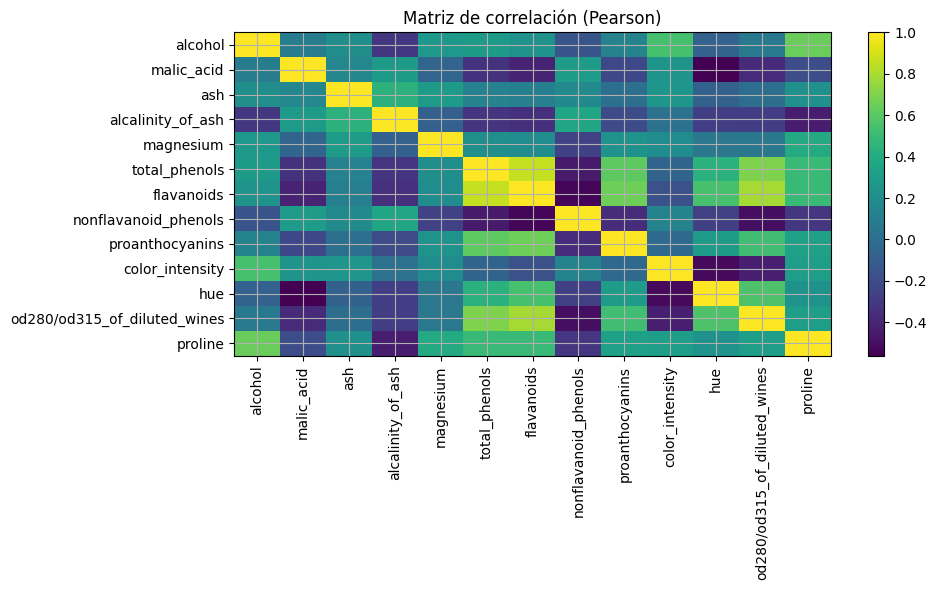

In [47]:
corr = X.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(corr.values, aspect="auto")
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.index)
fig.colorbar(im, ax=ax)
ax.set_title("Matriz de correlación (Pearson)")
plt.tight_layout()
plt.show()



## 3) Escalado de características (StandardScaler)

Estandarizamos las variables a media 0 y desviación estándar 1


In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Verificamos: media ~0, std ~1
display(X_scaled.describe().loc[["mean", "std"]])


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


## 4) Distancias y similitudes

Calculamos y comparamos distribuciones de:
- Distancia **Euclidiana** (L2)  
- Distancia **Manhattan** (L1)  
- **Similitud del coseno**

Primero, sobre datos **sin escalar** y luego **escalados**.


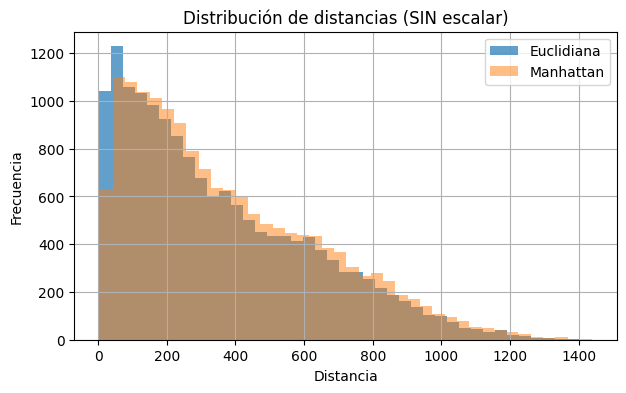

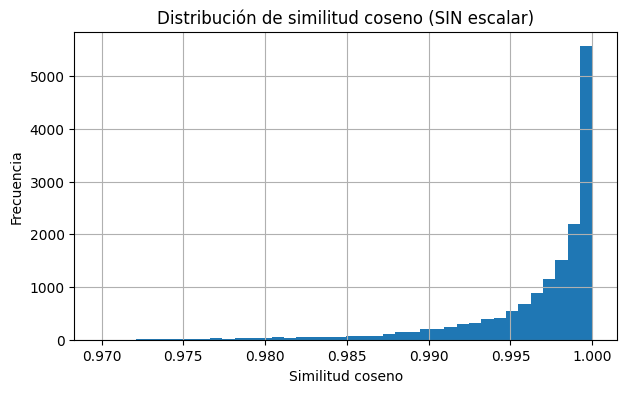

In [49]:
# --- SIN ESCALAR ---
D_euc_raw = pairwise_distances(X, metric="euclidean")
D_man_raw = pairwise_distances(X, metric="manhattan")
S_cos_raw = cosine_similarity(X)

n = D_euc_raw.shape[0]
mask_upper = np.arange(n)[:, None] < np.arange(n)

euc_vals = D_euc_raw[mask_upper]
man_vals = D_man_raw[mask_upper]
cos_vals = S_cos_raw[mask_upper]

fig, ax = plt.subplots()
ax.hist(euc_vals, bins=40, alpha=0.7, label="Euclidiana")
ax.hist(man_vals, bins=40, alpha=0.5, label="Manhattan")
ax.set_title("Distribución de distancias (SIN escalar)")
ax.set_xlabel("Distancia")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(cos_vals, bins=40)
ax.set_title("Distribución de similitud coseno (SIN escalar)")
ax.set_xlabel("Similitud coseno")
ax.set_ylabel("Frecuencia")
plt.show()

In [50]:
D_euc_raw.shape

(178, 178)

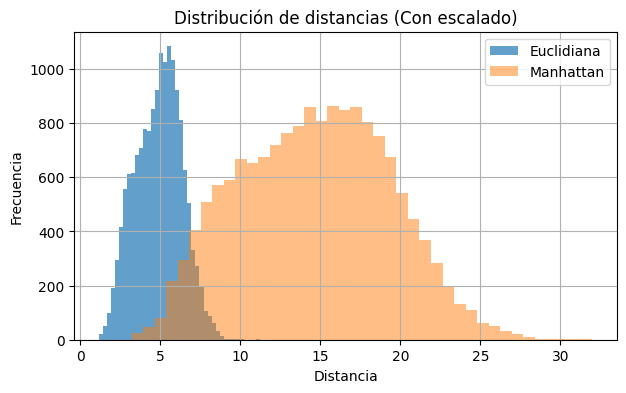

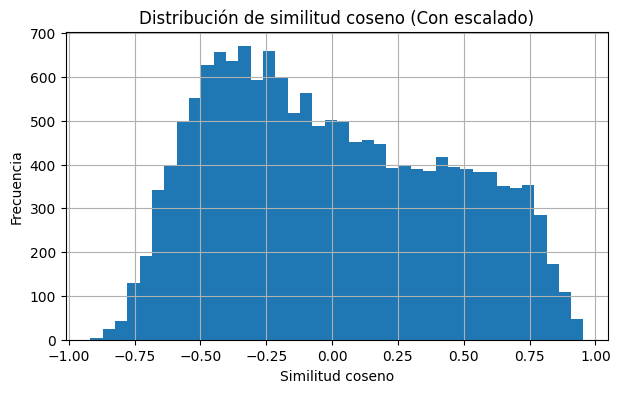

In [51]:
# --- CON ESCALAR ---
D_euc_raw = pairwise_distances(X_scaled, metric="euclidean")
D_man_raw = pairwise_distances(X_scaled, metric="manhattan")
S_cos_raw = cosine_similarity(X_scaled)

n = D_euc_raw.shape[0]
mask_upper = np.arange(n)[:, None] < np.arange(n)

euc_vals = D_euc_raw[mask_upper]
man_vals = D_man_raw[mask_upper]
cos_vals = S_cos_raw[mask_upper]

fig, ax = plt.subplots()
ax.hist(euc_vals, bins=40, alpha=0.7, label="Euclidiana")
ax.hist(man_vals, bins=40, alpha=0.5, label="Manhattan")
ax.set_title("Distribución de distancias (Con escalado)")
ax.set_xlabel("Distancia")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(cos_vals, bins=40)
ax.set_title("Distribución de similitud coseno (Con escalado)")
ax.set_xlabel("Similitud coseno")
ax.set_ylabel("Frecuencia")
plt.show()

## 5) PCA: varianza explicada y proyección 2D

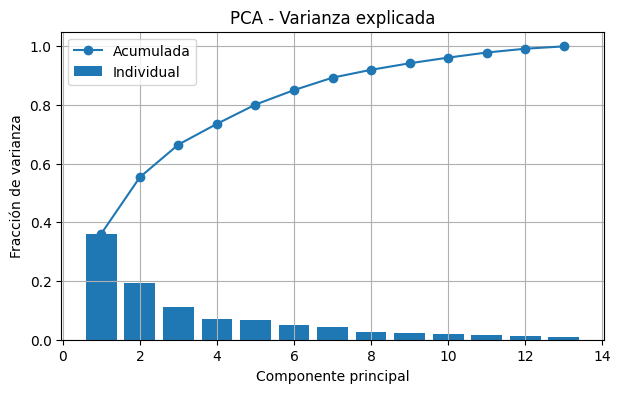

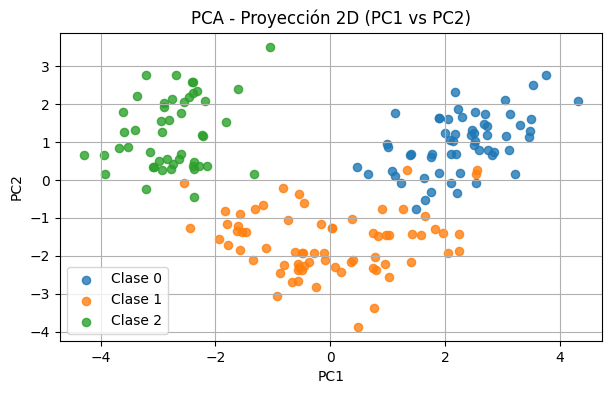

In [52]:
pca = PCA()
pca.fit(X_scaled)

exp_var = pca.explained_variance_ratio_
cum_exp = np.cumsum(exp_var)
k = len(exp_var)

# Varianza explicada
fig, ax = plt.subplots()
ax.bar(range(1, k+1), exp_var, label="Individual")
ax.plot(range(1, k+1), cum_exp, marker="o", label="Acumulada")
ax.set_xlabel("Componente principal")
ax.set_ylabel("Fracción de varianza")
ax.set_title("PCA - Varianza explicada")
ax.legend()
plt.show()

# Proyección 2D
Z = pca.transform(X_scaled)
pc1, pc2 = Z[:,0], Z[:,1]

fig, ax = plt.subplots()
for c in np.unique(y):
    sel = y.values == c
    ax.scatter(pc1[sel], pc2[sel], s=35, alpha=0.8, label=f"Clase {c}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA - Proyección 2D (PC1 vs PC2)")
ax.legend()
plt.show()


# Actividad

*   Calcular correlación Spearman para el dataset Wine, buscar la diferencia entre Spearman y Pearson.
*   Normalizar dataset con MinMaxScaler.
*   Comparar distancias Euclidiana y Manhattan con StandardScaler vs MinMaxScaler.
* Proyectar PCA en PC1 vs PC2, PC1 vs PC4 y PC4 vs PC6
* ¿Por qué las gráficas de PCA se ven de esa forma?



* Cuanto termine, me avisa para entregarle una L (logrado).
* Recuerde que las L otorgan un bono en la nota final de la asignatura.
* Pueden trabajar de a dos (o tres excepcionalmente).







# 1. Correlación Spearman para Wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.140430,0.243722,-0.306598,0.365503,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.024203,0.103050,0.633580
malic_acid,0.140430,1.000000,0.230674,0.304069,0.080188,-0.280225,-0.325202,0.255236,-0.244825,0.290307,-0.560265,-0.255185,-0.057466
ash,0.243722,0.230674,1.000000,0.366374,0.361488,0.132193,0.078796,0.145583,0.024384,0.283047,-0.050183,-0.007500,0.253163
alcalinity_of_ash,-0.306598,0.304069,0.366374,1.000000,-0.169558,-0.376657,-0.443770,0.389390,-0.253695,-0.073776,-0.352507,-0.325890,-0.456090
magnesium,0.365503,0.080188,0.361488,-0.169558,1.000000,0.246417,0.233167,-0.236786,0.173647,0.357029,0.036095,0.056963,0.507575


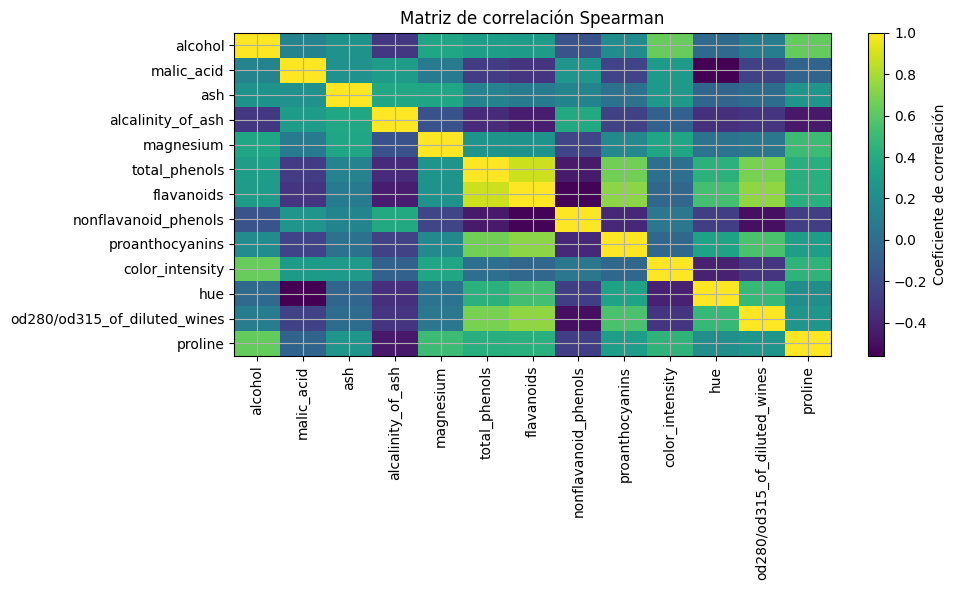

In [53]:
corr_spearman = X.corr(method="spearman")
display(corr_spearman.head())

# Graficamos
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(corr_spearman.values, aspect="auto")
ax.set_xticks(range(len(corr_spearman.columns)))
ax.set_yticks(range(len(corr_spearman.index)))
ax.set_xticklabels(corr_spearman.columns, rotation=90)
ax.set_yticklabels(corr_spearman.index)
fig.colorbar(im, ax=ax, label="Coeficiente de correlación")
ax.set_title("Matriz de correlación Spearman")
plt.tight_layout()
plt.show()



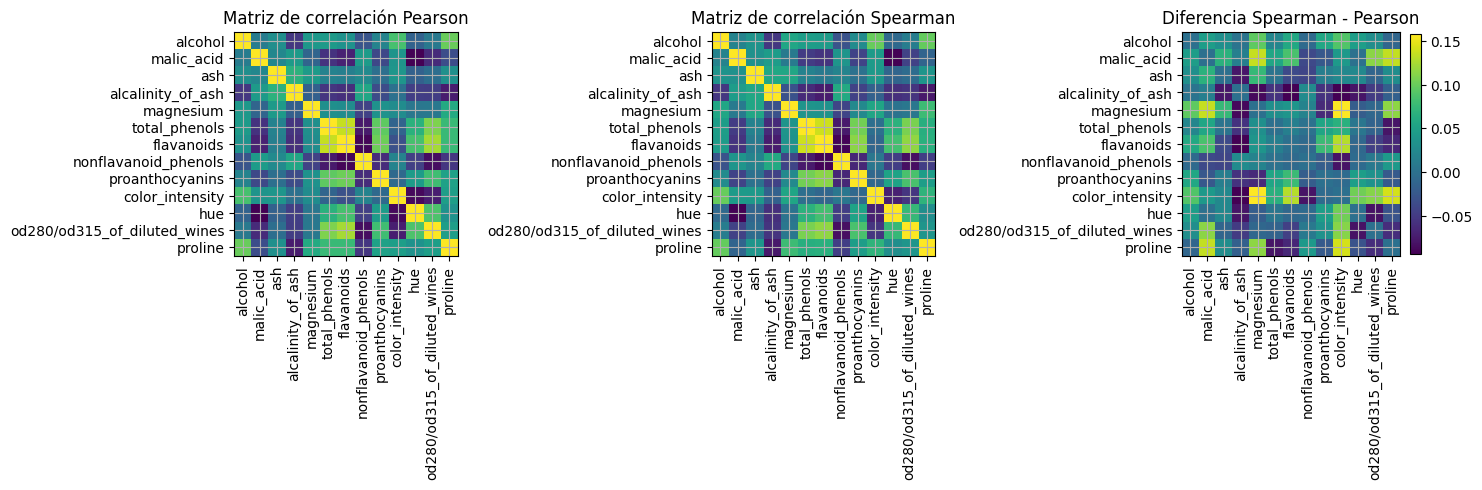

In [54]:
corr_pearson = X.corr(method="pearson")

corr_spearman = X.corr(method="spearman")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico Pearson
im1 = axs[0].imshow(corr_pearson)
axs[0].set_xticks(range(len(corr_pearson.columns)))
axs[0].set_yticks(range(len(corr_pearson.index)))
axs[0].set_xticklabels(corr_pearson.columns, rotation=90)
axs[0].set_yticklabels(corr_pearson.index)
axs[0].set_title("Matriz de correlación Pearson")

# Gráfico Spearman
im2 = axs[1].imshow(corr_spearman)
axs[1].set_xticks(range(len(corr_spearman.columns)))
axs[1].set_yticks(range(len(corr_spearman.index)))
axs[1].set_xticklabels(corr_spearman.columns, rotation=90)
axs[1].set_yticklabels(corr_spearman.index)
axs[1].set_title("Matriz de correlación Spearman")


# Gráfico de Diferencias
diff = corr_spearman - corr_pearson
im_diff = axs[2].imshow(diff, aspect="auto")
axs[2].set_xticks(range(len(diff.columns)))
axs[2].set_yticks(range(len(diff.index)))
axs[2].set_xticklabels(diff.columns, rotation=90)
axs[2].set_yticklabels(diff.index)
axs[2].set_title("Diferencia Spearman - Pearson")


fig.colorbar(im_diff, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

Más amarillo en el gráfico de la diferencia -> Spearman da una correlación mayor que Pearson 
Más morado en el gráfico de la diferencia -> Pearson da una correlación mayor que Spearman 


# 2. Normalizar dataset con MinMaxScaler.